# Importing Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset

- The dataset we will use, which has been previously mined and extracted from GitHub, is comprised of three files:
    - `pulls_2011-2013.csv` contains the basic information about the pull requests, and spans from the end of 2011 up to (but not including) 2014.
    - `pulls_2014-2018.csv` contains identical information, and spans from 2014 up to 2018.
    - `pull_files.csv` contains the files that were modified by each pull request.

In [2]:
pulls_one = pd.read_csv("datasets/pulls_2011-2013.csv")
pulls_two = pd.read_csv("datasets/pulls_2014-2018.csv")
pull_files = pd.read_csv("datasets/pull_files.csv")

In [8]:
pulls_one.head()

,pid,user,date
0,11166973,VladimirNik,2013-12-31T23:10:55Z
1,11161892,Ichoran,2013-12-31T16:55:47Z
2,11153894,Ichoran,2013-12-31T02:41:13Z
3,11151917,rklaehn,2013-12-30T23:45:47Z
4,11131244,qerub,2013-12-29T17:21:01Z


In [9]:
pulls_two.head()

,pid,user,date
0,163314316,hrhino,2018-01-16T23:29:16Z
1,163061502,joroKr21,2018-01-15T23:44:52Z
2,163057333,mkeskells,2018-01-15T23:05:06Z
3,162985594,lrytz,2018-01-15T15:52:39Z
4,162838837,zuvizudar,2018-01-14T19:16:16Z


In [12]:
pull_files.head()

,pid,file
0,163314316,test/files/pos/t5638/Among.java
1,163314316,test/files/pos/t5638/Usage.scala
2,163314316,test/files/pos/t9291.scala
3,163314316,test/files/run/t8348.check
4,163314316,test/files/run/t8348/TableColumn.java


# Data Preprocessing/Cleaning

- Next, the raw data extracted from GitHub contains dates in the ISO8601 format. 
- However, pandas imports them as regular strings. 
- To make our analysis easier, we need to convert the strings into Python's `DateTime` objects. 
- `DateTime` objects have the important property that they can be compared and sorted.
- The pull request times are all in UTC (also known as Coordinated Universal Time). 
- The commit times, however, are in the local time of the author with time zone information (number of hours difference from UTC). 
- To make comparisons easy, we should convert all times to UTC.

## Merging Pulls

In [5]:
pulls = pulls_one.append(pulls_two, ignore_index = True)

## Converting Dates

In [6]:
pulls['date'] = pd.to_datetime(pulls['date'], utc = True)

## Merging the DataFrames

In [7]:
df = pulls.merge(pull_files, on = "pid")

In [13]:
df.head()

,pid,user,date,file
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/api/Printers.scala
1,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/internal/Printers.scala
2,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/files/run/reify_ann3.check
3,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/junit/scala/reflect/internal/PrintersTest...
4,11161892,Ichoran,2013-12-31 16:55:47+00:00,src/library/scala/collection/mutable/ArrayOps....


## Creating Month Column

In [14]:
df['month'] = df['date'].dt.month

## Creating Year Column

In [15]:
df['year'] = df['date'].dt.year

In [16]:
df.head()

,pid,user,date,file,month,year
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/api/Printers.scala,12,2013
1,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/internal/Printers.scala,12,2013
2,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/files/run/reify_ann3.check,12,2013
3,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/junit/scala/reflect/internal/PrintersTest...,12,2013
4,11161892,Ichoran,2013-12-31 16:55:47+00:00,src/library/scala/collection/mutable/ArrayOps....,12,2013


## Renaming Columns

In [19]:
df.rename(columns = {'pid': "Pid", 'user': "User", 'date': "Date", 'file': "File", 'month': "Month", 'year': "Year"}, inplace = True)

## Rerranging Columns

In [21]:
df = df[['Pid', 'User', 'Date', 'Month', 'Year', 'File']]

In [22]:
df.head()

,Pid,User,Date,Month,Year,File
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00,12,2013,src/reflect/scala/reflect/api/Printers.scala
1,11166973,VladimirNik,2013-12-31 23:10:55+00:00,12,2013,src/reflect/scala/reflect/internal/Printers.scala
2,11166973,VladimirNik,2013-12-31 23:10:55+00:00,12,2013,test/files/run/reify_ann3.check
3,11166973,VladimirNik,2013-12-31 23:10:55+00:00,12,2013,test/junit/scala/reflect/internal/PrintersTest...
4,11161892,Ichoran,2013-12-31 16:55:47+00:00,12,2013,src/library/scala/collection/mutable/ArrayOps....


# EDA

- Before committing to contributing to a project, it is important to understand the state of the project. 
- Is development going steadily, or is there a drop? Has the project been abandoned altogether?
- The data used in this project was collected in January of 2018. We are interested in the evolution of the number of contributions up to that date.
- For Scala, we will do this by plotting a chart of the project's activity. 
- We will calculate the number of pull requests submitted each (calendar) month during the project's lifetime. We will then plot these numbers to see the trend of contributions.

<AxesSubplot:xlabel='Year,Month'>

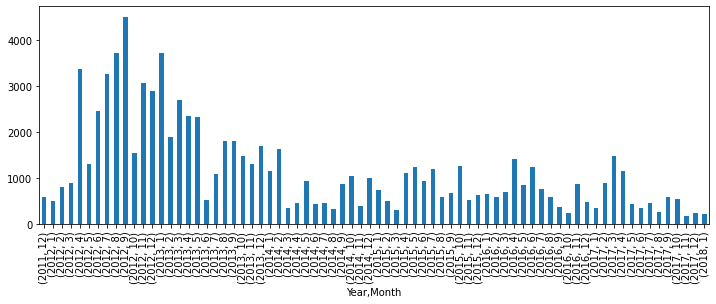

In [23]:
%matplotlib inline

# Group by month_year and count the pull requests
counts = df.groupby(['Year', 'Month'])['Pid'].count()

# Plot the results
counts.plot(kind = 'bar', figsize = (12,4))

- In order to evaluate the dynamics of the community, we will plot a histogram of the number of pull requests submitted by each user. 
- A distribution that shows that there are few people that only contribute a small number of pull requests can be used as in indicator that the project is not welcoming of new contributors

array([[<AxesSubplot:title={'center':'Pid'}>]], dtype=object)

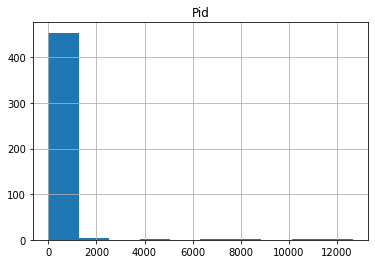

In [25]:
%matplotlib inline

# Group by the submitter
by_user = df.groupby('User').agg({'Pid': 'count'})

# Plot the histogram
by_user.hist()

## What files were changed in the last ten pull requests?

- Choosing the right place to make a contribution is as important as choosing the project to contribute to. Some parts of the code might be stable, some might be dead.
- Contributing there might not have the most impact.
- Therefore it is important to understand the parts of the system that have been recently changed. This allows us to pinpoint the "hot" areas of the code where most of the activity is happening. 
- Focusing on those parts might not the most effective use of our times.

In [30]:
# Identify the last 10 pull requests
last_10 = pulls.sort_values(by = 'date').tail(10)

In [31]:
# Join the two data sets
joined_pr = pull_files.merge(last_10, on='pid')

In [32]:
# Identify the unique files
files = set(joined_pr['file'])

# Print the results
files

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

## Who made the most pull requests to a given file?

- When contributing to a project, we might need some guidance. We might find ourselves needing some information regarding the codebase.
- It is important direct any questions to the right person.
- Contributors to open source projects generally have other day jobs, so their time is limited. It is important to address our questions to the right people. 
- One way to identify the right target for our inquiries is by using their contribution history.
- We identified `src/compiler/scala/reflect/reify/phases/Calculate.scala` as being recently changed. We are interested in the top 3 developers who changed that file.
- Those developers are the ones most likely to have the best understanding of the code

In [34]:
# This is the file we are interested in:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

In [36]:
# Identify the pull requests that changed the file
file_pr = df[df['File'] == file]

In [38]:
# Count the number of changes made by each developer
author_counts = file_pr.groupby('User').count()

In [40]:
# Print the top 3 developers
author_counts.nlargest(3, 'File')

,Pid,Date,Month,Year,File
User,,,,,
xeno-by,11,11,11,11,11
retronym,5,5,5,5,5
soc,4,4,4,4,4


## Who made the last ten pull requests on a given file?

- Open source projects suffer from fluctuating membership. 
- This makes the problem of finding the right person more challenging: the person has to be knowledgeable and still be involved in the project.
- A person that contributed a lot in the past might no longer be available (or willing) to help.
- To get a better understanding, we need to investigate the more recent history of that particular part of the system.
- Like in the previous task, we will look at the history of `src/compiler/scala/reflect/reify/phases/Calculate.scala`.

In [41]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

In [42]:
# Select the pull requests that changed the target file
file_pr = pull_files[pull_files['file'] == file]

In [43]:
# Merge the obtained results with the pulls DataFrame
joined_pr = pulls.merge(file_pr, on='pid')

In [44]:
# Find the users of the last 10 most recent pull requests
users_last_10 = set(joined_pr.nlargest(10, 'date')['user'])

In [45]:
# Printing the results
users_last_10

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

## The pull requests of two special developers

- Now that we have identified two potential contacts in the projects, we need to find the person who was most involved in the project in recent times. 
- That person is most likely to answer our questions.
- For each calendar year, we are interested in understanding the number of pull requests the authors submitted. 
- This will give us a high-level image of their contribution trend to the project.

<AxesSubplot:xlabel='date'>

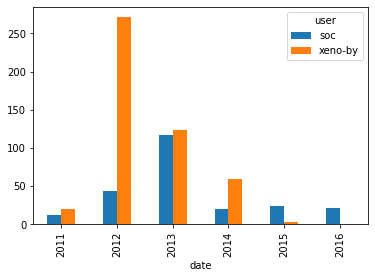

In [46]:
%matplotlib inline

# The developers we are interested in
authors = ['xeno-by', 'soc']

# Get all the developers' pull requests
by_author = pulls[pulls['user'].isin(authors)]

# Count the number of pull requests submitted each year
counts = by_author.groupby([by_author['user'], by_author['date'].dt.year]).agg({'pid': 'count'}).reset_index()

# Convert the table to a wide format
counts_wide = counts.pivot_table(index = 'date', columns = 'user', values = 'pid', fill_value=0)

# Plot the results
counts_wide.plot(kind = 'bar')

## Visualizing the contributions of each developer

- As mentioned before, it is important to make a distinction between the global expertise and contribution levels and the contribution levels at a more granular level (file, submodule, etc.) 
- In our case, we want to see which of our two developers of interest have the most experience with the code in a given file. 
- We will measure experience by the number of pull requests submitted that affect that file and how recent those pull requests were submitted.

<AxesSubplot:xlabel='Date'>

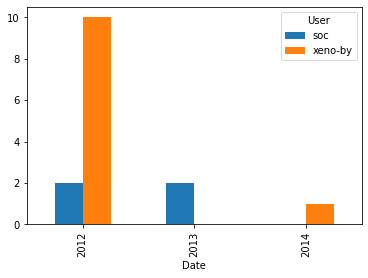

In [55]:
authors = ['xeno-by', 'soc']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Merge DataFrames and select the pull requests by the author
by_author = df[df['User'].isin(authors)]

# Select the pull requests that affect the file
by_file = by_author[by_author['File'] == file]

# Group and count the number of PRs done by each user each year
grouped = by_file.groupby(['User', by_file['Date'].dt.year]).count()['Pid'].reset_index()

# Transform the data into a wide format
by_file_wide = grouped.pivot_table(index='Date', columns='User', values='Pid', fill_value=0)

# Plot the results
by_file_wide.plot(kind='bar')